Notebook structure:
- 1. Importing libraries
- 2. Loading the dataset
- 3. Exploratory Data Analysis TODO Joao
- 4. Data Preprocessing TODO Joao
- 5. Model Training TODO Jorge
- 6. Model Evaluation TODO Jorge
- 8. Conclusion Todo

## 1. Importing libraries

In [1794]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing, tree, metrics, model_selection, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, MinMaxScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import tensorflow as tf
import datetime
import random


# Lois
from lois import lois_ds_report
%matplotlib inline

## 2. Loading the dataset

In [1795]:
train_data = pd.read_csv('data/training_data.csv')
test_data = pd.read_csv('data/test_data.csv')

# Add a "fake target" column to the test data
test_data['incidents'] = "test-only"

# Concatenate the training and test data
dataset = pd.concat([train_data, test_data], axis=0)

# Drop city name and avg_precipitation: always the same value
dataset.drop('avg_precipitation', axis=1, inplace=True)
dataset.drop('city_name', axis=1, inplace=True)


### Ideias para análise de dados

Magnitude of delay / Delay in Seconds
Affected roads
Date and Time
Luminosity
Temperature, Pressure, Humidity, Wind, Rain
Incidents

1. The most affected road: You can group the data by the affected roads column and then use a pivot table or some other tool to find out which road has the highest number of incidents.

2. Relationship between weather conditions and incidents: You can use the temperature, pressure, humidity, wind, and rain columns to see if there is any relationship between these weather conditions and the number of incidents. For example, you might find that there are more incidents when it is raining or when the wind is strong.

3. Magnitude of delay and weather conditions: You can use the magnitude of delay/delay in seconds column and the weather condition columns (temperature, pressure, humidity, wind, and rain) to see if there is any relationship between the magnitude of delay and the weather conditions. For example, you might find that the magnitude of delay is higher when it is raining or when the wind is strong.

4. Time of day and incidents: You can use the date/time column to see if there are any trends in the number of incidents over the course of a day. For example, you might find that there are more incidents during rush hour or during the night.

5. Luminosity and incidents: You can use the luminosity column to see if there is any relationship between the level of light and the number of incidents. For example, you might find that there are more incidents in the dark.


a few more relations between X column and incidents.

## 3. Exploratory Data Analysis

╭─────────────────────────────────────────── Exploratory Data Anlysis ────────────────────────────────────────────╮
│                                                                                                                 │
╰──────────────────────────────────── EDA|simple| Suitable for data scientist ────────────────────────────────────╯

EDA
┗━━ Dataset Shape Analysis
    ┣━━ Dataset head
    ┣━━ General info 
    ┣━━ The target variable
    ┣━━ Number of rows and columns
    ┣━━ The different data types
    ┃   ┣━━ The sum of different variable type
    ┃   ┗━━ Visual representation of different variable type
    ┗━━ Analyze missing value
        ┣━━ The percentage of missing value in each columns
        ┣━━ The missing value counts
        ┗━━ Visual representation of missing value

╭──────────────────────────────────────────── DATASET SHAPE ANALYSIS ─────────────────────────────────────────────╮
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

-------------------- THE HEAD OF YOUR DATASET --------------------

Your dataset is too large ; only the first 8 columns will be display

                                                    The Dataset                                                    
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓
┃ magnitude_of_… ┃ delay_in_se… ┃ affected_… ┃ record… ┃ lumi… ┃ avg_temper… ┃ avg_atm_pr… ┃ avg_hum… ┃ avg_wind… ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩
└────────────────┴──────────────┴────────────┴─────────┴───────┴─────────────┴─────────────┴──────────┴───────────┘

-------------------- SOME GENERAL INFO ABOUT YOUR DATASET --------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6206 entries, 0 to 1205
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  6206 non-null   object 
 1   delay_in_seconds    6206 non-null   int64  
 2   affected_roads      6099 non-null   object 
 3   record_date         6206 non-null   object 
 4   luminosity          6206 non-null   object 
 5   avg_temperature     6206 non-null   float64
 6   avg_atm_pressure    6206 non-null   float64
 7   avg_humidity        6206 non-null   float64
 8   avg_wind_speed      6206 non-null   float64
 9   avg_rain            6206 non-null   object 
 10  incidents           6206 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 581.8+ KB


-------------------- THE TARGET VARIABLE OF YOUR DATASET --------------------

╭───────────────────────────────────────╮
│ The Target variable is : 'incidents'  │
╰───────────────────────────────────────╯

-------------------- ROWS AND COLUMNS IN YOUR DATASET --------------------

╭─ Shape output ─╮
│ (6206, 11)     │
╰────────────────╯

╭────────────────────────────────────────────────╮
│ Your dataset contains 6206 Rows and 11 Columns │
╰────────────────────────────────────────────────╯

-------------------- THE DATA TYPES IN YOUR DATASET --------------------

╭─ Data types output ─╮
│ object     6        │
│ float64    4        │
│ int64      1        │
│ dtype: int64        │
╰─────────────────────╯

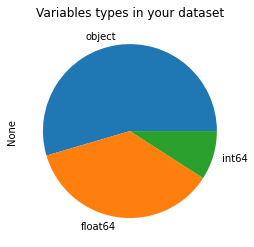

-------------------- MISSING VALUE IN YOUR DATASET --------------------

╭───── Missing value output ─────╮
│ magnitude_of_delay    0.000000 │
│ delay_in_seconds      0.000000 │
│ record_date           0.000000 │
│ luminosity            0.000000 │
│ avg_temperature       0.000000 │
│ avg_atm_pressure      0.000000 │
│ avg_humidity          0.000000 │
│ avg_wind_speed        0.000000 │
│ avg_rain              0.000000 │
│ incidents             0.000000 │
│ affected_roads        0.017241 │
│ dtype: float64                 │
╰────────────────────────────────╯

╭─ Missing value counts output ─╮
│ 0.017241     1                │
│ 0.000000    10                │
│ dtype: int64                  │
╰───────────────────────────────╯

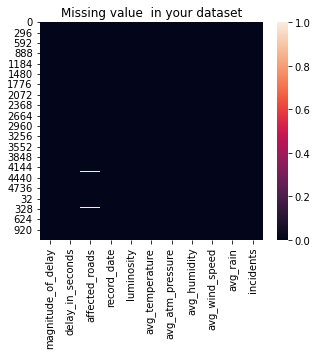

#################### END ####################

In [1796]:
lois_ds_report(dataset,target_variable="incidents")

In [1797]:
dataset.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High


## 4. Data Preprocessing

### Look for any Duplicated Rows

In [1798]:
# Is there any duplicated data?
print("Number of duplicated rows: {}".format(dataset.duplicated().sum()))

Number of duplicated rows: 0


#### Handle Affected Roads

In [1799]:
# Column affected_roads is a list of roads that are affected by the incident.
# Replace this column with the number of roads affected by the incident.
# Iterate over the number of affected roads of each incident.
def replace_affected_roads(data):
    
    for index, row in data.iterrows():
        # Check if the value is NaN
        split_roads = []
        if not pd.isnull(row['affected_roads']):
            split_roads = row['affected_roads'].split(',')
        
        # Remove empty strings
        split_roads = list(filter(None, split_roads))
        
        # Remove duplicates
        split_roads = list(dict.fromkeys(split_roads))
        
        data.at[index, 'affected_roads'] = len(split_roads)
        
    # Rename column
    data['affected_roads'] = data['affected_roads'].astype('int64')
    data.rename(columns={'affected_roads': 'number_of_affected_roads'}, inplace=True)
    
    return data

if 'affected_roads' in dataset.columns:
    dataset = replace_affected_roads(dataset)

In [1800]:
# Count zeros of 'number_of_affected_roads' column
print("Number of zeros in 'number_of_affected_roads' column: {}".format(dataset['number_of_affected_roads'].isin([0]).sum()))

# TODO: Anythig else to do with affected_roads? To much zeros

Number of zeros in 'number_of_affected_roads' column: 1003


### Handle Categorical data

In [1801]:
# There are 5 non-numeric columns: magnitude_of_delay, record_date, luminosity, avg_rain and incidents
# See the different values of each column - exclude record_date, because it is a date (\:)
non_numeric_columns = ['magnitude_of_delay', 'luminosity', 'avg_rain', 'incidents']
for column in non_numeric_columns:
    print("Column: {}".format(column))
    print(dataset[column].unique())
    print("-----------------------------------------------------------------------") 

Column: magnitude_of_delay
['UNDEFINED' 'MAJOR' 'MODERATE']
-----------------------------------------------------------------------
Column: luminosity
['DARK' 'LIGHT' 'LOW_LIGHT']
-----------------------------------------------------------------------
Column: avg_rain
['Sem Chuva' 'chuva moderada' 'chuva fraca' 'chuva forte']
-----------------------------------------------------------------------
Column: incidents
['None' 'Low' 'Very_High' 'High' 'Medium' 'test-only']
-----------------------------------------------------------------------


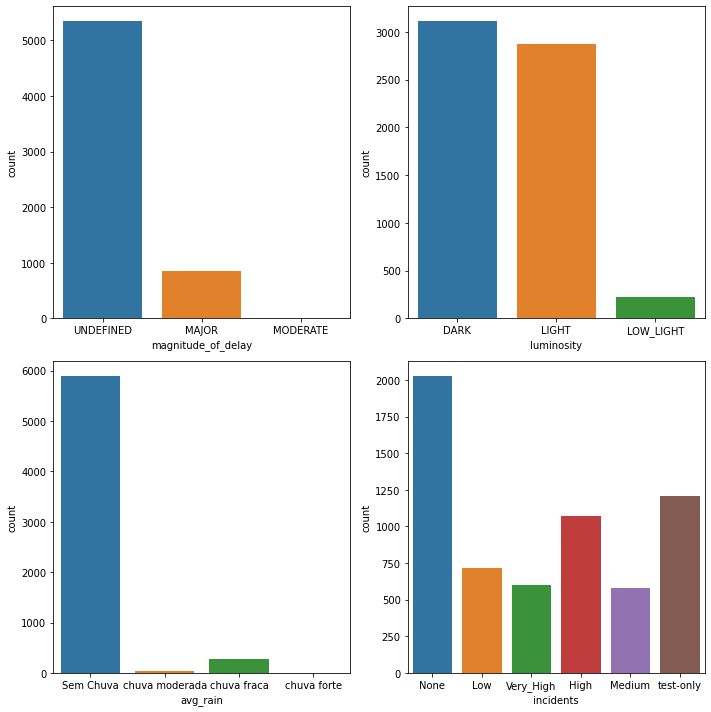

In [1802]:
# Get the distribution of the non-numeric columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for idx, column in enumerate(non_numeric_columns):
    sns.countplot(x=column, data=dataset, ax=axes[idx // 2, idx % 2])
plt.tight_layout()
plt.show()

#### Magnitude of delay / Delay in Seconds

<AxesSubplot:xlabel='incidents', ylabel='count'>

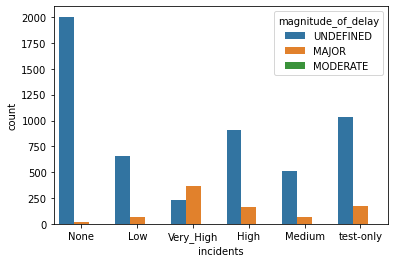

In [1803]:
# Relation between "MAJOR" delays and the incidents
sns.countplot(x='incidents', hue='magnitude_of_delay', data=dataset)

Number of UNDEFINED delays: 5344
Number of MAJOR delays: 853
Number of MODERATE delays: 9


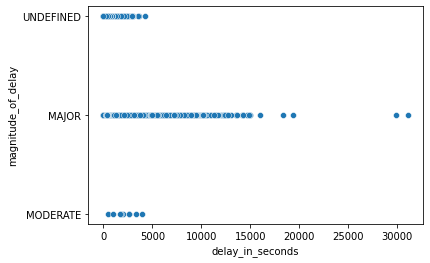

In [1804]:
# Relation between magnitude of delay and delay in seconds
sns.scatterplot(x='delay_in_seconds', y='magnitude_of_delay', data=dataset)

# Count the UNDIFINED, MAJOR and MODERATE delays
print("Number of UNDEFINED delays: {}".format(dataset[dataset['magnitude_of_delay'] == 'UNDEFINED'].shape[0]))
print("Number of MAJOR delays: {}".format(dataset[dataset['magnitude_of_delay'] == 'MAJOR'].shape[0]))
print("Number of MODERATE delays: {}".format(dataset[dataset['magnitude_of_delay'] == 'MODERATE'].shape[0]))

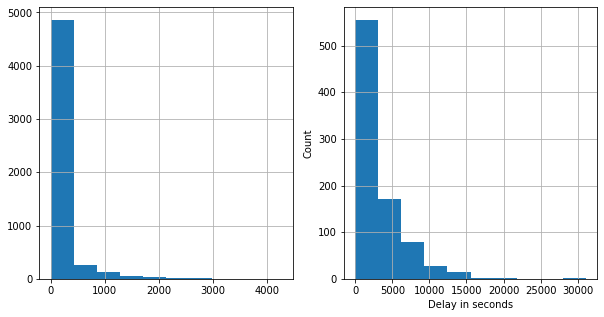

Average delay in seconds for UNDEFINED delays: 123.35778443113773
Average delay in seconds for MODERATE delays: 2182.4444444444443
Average delay in seconds for MAJOR delays: 3288.928487690504


In [1805]:
# Get distribution of values of delay_in_seconds that have a magnitude_of_delay of "MAJOR" and "UNDEFINED"
undefined_delay = dataset[dataset['magnitude_of_delay'] == 'UNDEFINED']
major_delay = dataset[dataset['magnitude_of_delay'] == 'MAJOR']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
undefined_delay['delay_in_seconds'].hist(ax=axes[0])
major_delay['delay_in_seconds'].hist(ax=axes[1])
plt.xlabel('Delay in seconds')
plt.ylabel('Count')
plt.show()

# Print average delay in seconds for each magnitude of delay
print("Average delay in seconds for UNDEFINED delays: {}".format(undefined_delay['delay_in_seconds'].mean()))
print("Average delay in seconds for MODERATE delays: {}".format(dataset[dataset['magnitude_of_delay'] == 'MODERATE']['delay_in_seconds'].mean()))
print("Average delay in seconds for MAJOR delays: {}".format(major_delay['delay_in_seconds'].mean()))


In [1806]:
# Count zero values of delay_in_seconds
print("Number of zero values of delay_in_seconds: {}".format(dataset[dataset['delay_in_seconds'] == 0].shape[0]))

# Count zero values of delay_in_seconds that have a magnitude_of_delay of "MAJOR" and "UNDEFINED"
print("Number of zero values of delay_in_seconds with UNDEFINED magnitude_of_delay: {}".format(undefined_delay[undefined_delay['delay_in_seconds'] == 0].shape[0]))
print("Number of zero values of delay_in_seconds with MAJOR magnitude_of_delay: {}".format(major_delay[major_delay['delay_in_seconds'] == 0].shape[0]))

Number of zero values of delay_in_seconds: 3981
Number of zero values of delay_in_seconds with UNDEFINED magnitude_of_delay: 3953
Number of zero values of delay_in_seconds with MAJOR magnitude_of_delay: 28


In [1807]:
# Get count of the incidents that have a magnitude_of_delay of "MAJOR" per type...
major_delay_zero = major_delay[major_delay['delay_in_seconds'] < 250]
print(major_delay_zero['incidents'].value_counts())

Low          32
test-only    10
None          9
Medium        2
Name: incidents, dtype: int64


Skewness (all): 6.044188264462225
Skewness (non-zero): 3.8291844458228224


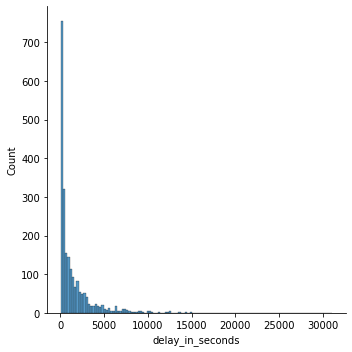

In [1808]:
# Plot the distribution of the 'delay_in_seconds' column non-zero values
sns.displot(dataset[dataset['delay_in_seconds'] > 0]['delay_in_seconds'])
print("Skewness (all): {}".format(dataset['delay_in_seconds'].skew()))
print("Skewness (non-zero): {}".format(dataset[dataset['delay_in_seconds'] > 0]['delay_in_seconds'].skew()))

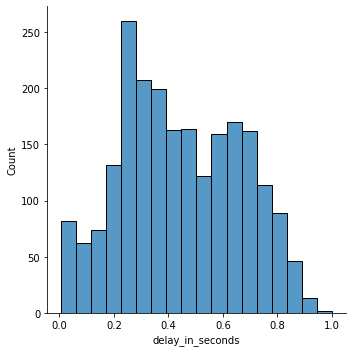

In [1809]:
if 'magnitude_of_delay' in dataset.columns:
    # Map values no numeric
    # TODO: Tune this values as needed!
    dict_magnitude_of_delay = {'UNDEFINED': 1, 'MODERATE':1.5, 'MAJOR':2}
    dataset['magnitude_of_delay'] = dataset['magnitude_of_delay'].map(dict_magnitude_of_delay)
    
    # Multiply the 'delay_in_seconds' column by the 'magnitude_of_delay' column
    #
    # The reason for this is that the 'delay_in_seconds' column has a lot of zero values.
    # The "UNDEFINED" has a delay of 0 seconds in 75% of the cases.
    #  It has 94% of values under 10 minutes.
    #
    dataset['delay_in_seconds'] = dataset['delay_in_seconds'] * dataset['magnitude_of_delay']
    
    # Apply log transformation to the non-zero values of 'delay_in_seconds' column)
    dataset.loc[dataset['delay_in_seconds'] > 0, 'delay_in_seconds'] = np.log(dataset.loc[dataset['delay_in_seconds'] > 0, 'delay_in_seconds'])
    
    # Scale the non-zero values of 'delay_in_seconds' column
    scaler = MinMaxScaler()
    dataset.loc[dataset['delay_in_seconds'] > 0, 'delay_in_seconds'] = scaler.fit_transform(dataset.loc[dataset['delay_in_seconds'] > 0, 'delay_in_seconds'].values.reshape(-1, 1))
    
    # Plot the distribution of the non-zero values of 'delay_in_seconds' column
    sns.displot(dataset[dataset['delay_in_seconds'] > 0]['delay_in_seconds'])
    
    # Drop magnitude_of_delay column
    dataset.drop('magnitude_of_delay', axis=1, inplace=True)
    
    # Rename column as 'delay_coefficient'
    dataset.rename(columns={'delay_in_seconds': 'delay_coefficient'}, inplace=True)


In [1810]:
# TODO: The 'delay_coefficient' column has a lot of zero values!!
# Also, should we convert to binary delay/no delay? Binning?
print("Number of zero values of delay_coefficient: {}".format(dataset[dataset['delay_coefficient'] == 0].shape[0]))

Number of zero values of delay_coefficient: 3986


#### Luminosity

In [1811]:
# Count different values of the 'luminosity' column
dataset['luminosity'].value_counts()

DARK         3112
LIGHT        2871
LOW_LIGHT     223
Name: luminosity, dtype: int64

None         72
High         52
test-only    37
Very_High    24
Medium       21
Low          17
Name: incidents, dtype: int64


<AxesSubplot:xlabel='luminosity', ylabel='count'>

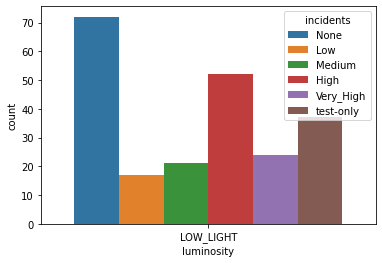

In [1812]:
# Relation between LOW_LIGHT 'luminosity' and 'incidents'
low_luminosity = dataset[dataset['luminosity'] == 'LOW_LIGHT']
print(low_luminosity['incidents'].value_counts())
sns.countplot(x='luminosity', hue='incidents', data=low_luminosity)

In [1813]:
# None + Low = 87
# High + Very High = 76
#
# The 'luminosity' column, when it is LOW_LIGHT, has a similar probability of having an incident or not.
# So, whenever we find a LOW_LIGHT value, we will randomly assign a value of 0 or 1.
#
def binary_luminosity(value):
    if value == 'LOW_LIGHT':
        random.seed(2022) # TODO: Set seed for reproducibility
        return random.randint(0, 1)
    elif value == 'DARK':
        return 0
    elif value == 'LIGHT':
        return 1
    else:
        print("ERROR: Invalid value for 'luminosity' column: {}".format(value))

def non_binary_luminosity(value):
    if value == 'DARK':
        return 0
    elif value == 'LOW_LIGHT':
        return 1
    elif value == 'LIGHT':
        return 2
    else:
        print("ERROR: Invalid value for 'luminosity' column: {}".format(value))


if 'luminosity' in dataset.columns and dataset['luminosity'].dtype == 'object':
    dataset['luminosity'] = dataset['luminosity'].apply(non_binary_luminosity)

#### Average Rain

In [1814]:
# Count different values of the 'avg_rain' column.
print(dataset['avg_rain'].value_counts())

Sem Chuva         5896
chuva fraca        270
chuva moderada      35
chuva forte          5
Name: avg_rain, dtype: int64


None         67
test-only    56
High         50
Very_High    39
Low          32
Medium       26
Name: incidents, dtype: int64


<AxesSubplot:xlabel='avg_rain', ylabel='count'>

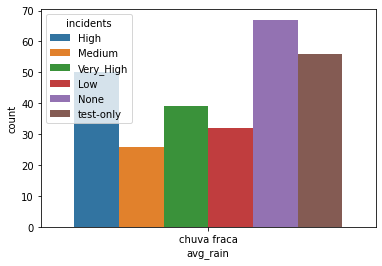

In [1815]:
# Get the incidents per value of 'avg_rain'==chuva fraca
chuva_fraca = dataset[dataset['avg_rain'] == 'chuva fraca']
print(chuva_fraca['incidents'].value_counts())
sns.countplot(x='avg_rain', hue='incidents', data=chuva_fraca)

In [1816]:
# Transform the 'avg_rain' column into binary values: rain/no rain
def binary_rain(value):
    if value == 'Sem Chuva':
        return 0
    else:
        return 1

def non_binary_rain(value):
    if value == 'Sem Chuva':
        return 0
    elif value == 'chuva fraca':
        return 1
    elif value == 'chuva moderada':
        return 2
    elif value == 'chuva forte':
        return 3

# Average rain
if 'avg_rain' in dataset.columns and dataset['avg_rain'].dtype == 'object':
    dataset['avg_rain'] = dataset['avg_rain'].apply(non_binary_rain)

### Handle Non-Categorical Data

#### Helper Functions

In [1817]:
# Count the number of outliers per column with the IQR method; have an option to remove the outliers
def count_outliers_IQR(data, column, remove_outliers=False, verbose=False):
    # Calculate the 1st and 3rd quartile
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    # Calculate the IQR
    IQR = q3 - q1
    # Calculate the lower and upper bound
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    # Count the number of outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    if verbose:
        print("Number of outliers for column {} is {}".format(column, outliers.shape[0]))
    # Remove the outliers
    if remove_outliers:
        number_of_rows_before = data.shape[0]
        data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]
        print("Removed {} rows from the dataset".format(number_of_rows_before - data.shape[0]))
    return data

# Count the number of outliers per column with the Z-score method; have an option to remove the outliers
def count_outliers_Z_score(data, column, remove_outliers=False, verbose=False):
    # Calculate the Z-score
    z = np.abs(stats.zscore(data[column]))
    # Count the number of outliers
    outliers = data[z > 3]
    if verbose:
        print("Number of outliers for column {} is {}".format(column, outliers.shape[0]))
    # Remove the outliers
    if remove_outliers:
        number_of_rows_before = data.shape[0]
        data = data[z < 3]
        print("Removed {} rows from the dataset".format(number_of_rows_before - data.shape[0]))
    return data

#### Average Temperature

count    6206.000000
mean       14.595875
std         4.795352
min         1.000000
25%        11.000000
50%        14.000000
75%        18.000000
max        35.000000
Name: avg_temperature, dtype: float64
Skewness: 0.5402003354292293


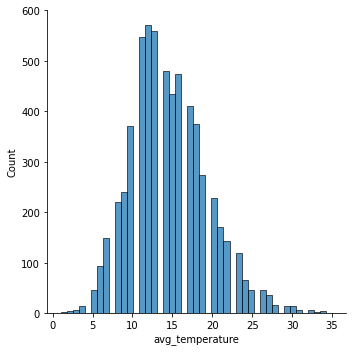

In [1818]:
# Distribution of the 'avg_temperature' column
sns.displot(dataset['avg_temperature'])
print(dataset['avg_temperature'].describe())
print("Skewness: {}".format(dataset['avg_temperature'].skew()))

Number of outliers for column avg_temperature is 50
Number of outliers for column avg_temperature is 50

Outlier ceil: 28.981930577131205
Outlier floor: 0.20981934230160348
count    6206.000000
mean       14.595875
std         4.795352
min         1.000000
25%        11.000000
50%        14.000000
75%        18.000000
max        35.000000
Name: avg_temperature, dtype: float64


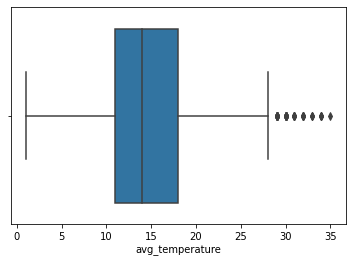

In [1819]:
# Boxplot of the 'avg_temperature' column
sns.boxplot(x=dataset['avg_temperature'])

# Count the number of outliers for the 'avg_temperature' column
count_outliers_IQR(dataset, 'avg_temperature', verbose=True, remove_outliers=False)
count_outliers_Z_score(dataset, 'avg_temperature', verbose=True, remove_outliers=False)
print()

#  Get max and min values for the 'avg_temperature' column outliers using the Z-score method.
max_value = dataset['avg_temperature'].mean() + 3 * dataset['avg_temperature'].std()
min_value = dataset['avg_temperature'].mean() - 3 * dataset['avg_temperature'].std()

print("Outlier ceil: {}".format(max_value))
print("Outlier floor: {}".format(min_value))
print(dataset['avg_temperature'].describe())

None         14
Low          12
Very_High     8
test-only     7
High          7
Medium        2
Name: incidents, dtype: int64


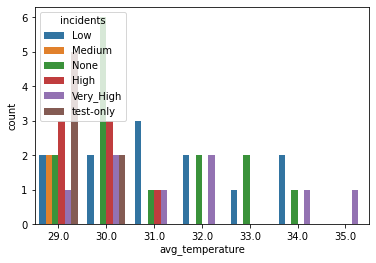

In [1820]:
# Let's check the relation between the 'avg_temperature' outliers and 'incidents' (grpahically)
outliers = dataset[(dataset['avg_temperature'] > max_value)]
print(outliers['incidents'].value_counts())
sns.countplot(x='avg_temperature', hue='incidents', data=outliers)

# There are 0.008% temperature outliers. It's not a lot.
#  The temperatures are not that extreme and can be considered as valid data.
# 
# Normalize the 'avg_temperature' column
# The date is not extremely skewed, so we will use the MinMaxScaler.
scaler = MinMaxScaler()
dataset['avg_temperature'] = scaler.fit_transform(dataset['avg_temperature'].values.reshape(-1, 1))

#### Average Humidity

count    6206.000000
mean       74.340477
std        17.204386
min         6.000000
25%        63.000000
50%        78.000000
75%        90.000000
max       100.000000
Name: avg_humidity, dtype: float64
Skewness: -0.7492086582905623


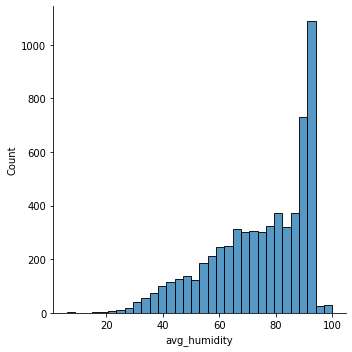

In [1821]:
# Distribution of the 'avg_humidity' column
sns.displot(dataset['avg_humidity'])
print(dataset['avg_humidity'].describe())
print("Skewness: {}".format(dataset['avg_humidity'].skew()))

Number of outliers for column avg_humidity is 11
Number of outliers for column avg_humidity is 11

3200     6.0
3639     7.0
716      7.0
2999     8.0
3245     8.0
267     17.0
2973    17.0
4743    17.0
4646    18.0
402     20.0
4182    21.0
Name: avg_humidity, dtype: float64
Removed 11 rows from the dataset


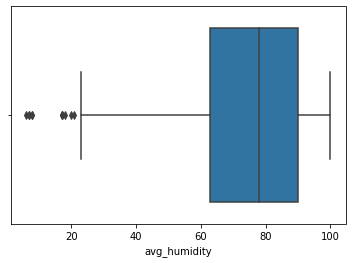

In [1822]:
# Boxplot of the 'avg_humidity' column
sns.boxplot(x=dataset['avg_humidity'])

# Count the number of outliers for the 'avg_humidity' column
count_outliers_IQR(dataset, 'avg_humidity', verbose=True, remove_outliers=False)
count_outliers_Z_score(dataset, 'avg_humidity', verbose=True, remove_outliers=False)
print()

# Get 11 most small values for the 'avg_humidity' column.
print(dataset['avg_humidity'].nsmallest(11))

# Since the 'avg_humidity' column has a very reduced number of outliers, we will remove them.
# Also, these values are not representative and occur only in specific circumstances.
# For instance, the average humidity in the shaara desert is 25%.
# In the antarctic, humidity is sometimes close to 0%.
# But apparently, in Guimarães, the humidity can have values as low as 6.0%.
dataset = count_outliers_IQR(dataset, 'avg_humidity', verbose=False, remove_outliers=True)

# Normalize the 'avg_humidity' column
scaler = MinMaxScaler()
dataset['avg_humidity'] = scaler.fit_transform(dataset['avg_humidity'].values.reshape(-1, 1))

#### Average Wind Speed

count    6195.000000
mean        1.269976
std         1.284122
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: avg_wind_speed, dtype: float64
Skewness: 1.3805217817432955


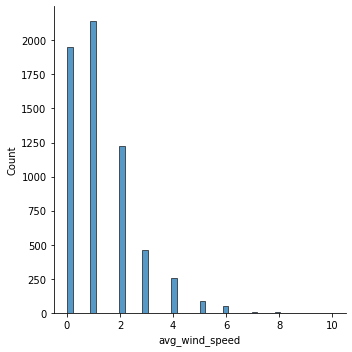

In [1823]:
# Distribution of the 'avg_wind_speed' column
sns.displot(dataset['avg_wind_speed'])
print(dataset['avg_wind_speed'].describe())
print("Skewness: {}".format(dataset['avg_wind_speed'].skew()))

Number of outliers for column avg_wind_speed is 63
Number of outliers for column avg_wind_speed is 63



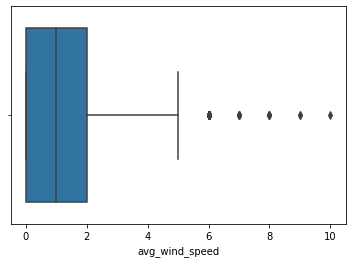

In [1824]:
# Boxplot of the 'avg_wind_speed' column
sns.boxplot(x=dataset['avg_wind_speed'])

# Count the number of outliers for the 'avg_wind_speed' column
count_outliers_IQR(dataset, 'avg_wind_speed', verbose=True, remove_outliers=False)
count_outliers_Z_score(dataset, 'avg_wind_speed', verbose=True, remove_outliers=False)
print()

# With this number of outliers, we will do nothing.
# The values are not that extreme and can be considered as valid data.
#
# Since the data is not normally distributed, and is skewed to the right
#  we will use a scaler that is not sensitive to outliers/normal distribution.
#scaler = PowerTransformer()
#dataset['avg_wind_speed'] = scaler.fit_transform(dataset['avg_wind_speed'].values.reshape(-1, 1))

# Now that the data is more normally distributed, we can use the MinMaxScaler.
scaler = MinMaxScaler()
dataset['avg_wind_speed'] = scaler.fit_transform(dataset['avg_wind_speed'].values.reshape(-1, 1))

#### Average Pressure

count    6195.000000
mean     1018.117837
std         5.202425
min       997.000000
25%      1015.000000
50%      1019.000000
75%      1022.000000
max      1031.000000
Name: avg_atm_pressure, dtype: float64
Skewness: -0.41685371150141426


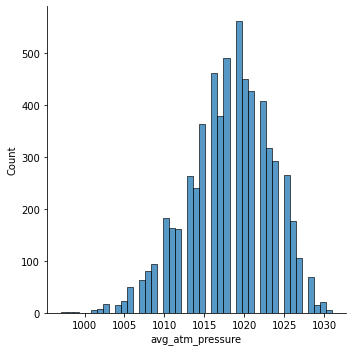

In [1825]:
# Distribution of the 'avg_atm_pressure' column
sns.displot(dataset['avg_atm_pressure'])
print(dataset['avg_atm_pressure'].describe())
print("Skewness: {}".format(dataset['avg_atm_pressure'].skew()))

Number of outliers for column avg_atm_pressure is 57
Number of outliers for column avg_atm_pressure is 22


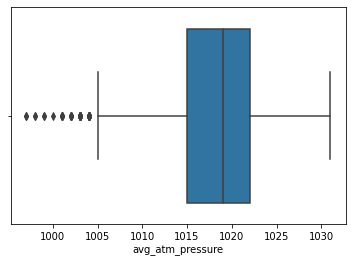

In [1826]:
# Boxplot of the 'avg_atm_pressure' column
sns.boxplot(x=dataset['avg_atm_pressure'])

# Count the number of outliers for the 'avg_atm_pressure' column
count_outliers_IQR(dataset, 'avg_atm_pressure', verbose=True, remove_outliers=False)
count_outliers_Z_score(dataset, 'avg_atm_pressure', verbose=True, remove_outliers=False)

# The minimum value of 997 is not an abnormal value for the atmospheric pressure.
# Since there are not many outliers, we will not remove them.
# Also, the values are not that extreme and can be considered as valid data.
#
# Let's normalize the 'avg_atm_pressure' column
scaler = MinMaxScaler()
dataset['avg_atm_pressure'] = scaler.fit_transform(dataset['avg_atm_pressure'].values.reshape(-1, 1))

#### Handling the date

In [1827]:
# Use the hour and month value as continuous variables
# Create a binary variable for weekend or not
def create_time_variables(data):
    for index, row in data.iterrows():
        # Get the hour
        hour = int(row['record_date'].split(' ')[1].split(':')[0])
        data.at[index, 'hour'] = hour
        
        # Get the month
        date = row['record_date'].split(' ')[0]
        month = int(date.split('-')[1])
        data.at[index, 'month'] = month
        
        # Check if it is a weekend
        # Convert the date to a datetime object
        dateTimeObj = datetime.datetime.strptime(date, "%Y-%m-%d")
        day_of_week_bool = dateTimeObj.isoweekday() in [6, 7]        
        data.at[index, 'weekend'] = int(day_of_week_bool)
    
    # Convert the 'hour', 'month' and weekend columns to int
    data['hour'] = data['hour'].astype(int)
    data['month'] = data['month'].astype(int)
    data['weekend'] = data['weekend'].astype(int)
    
    return data

if 'record_date' in dataset.columns:
    dataset = create_time_variables(dataset)
                
    # Drop record_date
    dataset.drop('record_date', axis=1, inplace=True)

In [1828]:
#sns.heatmap(dataset.corr(), annot=True, fmt='.2f')

In [1829]:
# Get the profile report - later analyze the results
# dataset.profile_report()

## 5. Models Training

#### Helper Functions

In [1830]:
""" Save results to a file. """
def saveResults ( results, path ):
    file = open(path, 'w')
    file.write ("RowId,Incidents\n")
    i = 1
    for result in results :
        file.write (str(i) + "," + result + "\n")
        i += 1

#### Splitting the dataset

In [1831]:
# run for test or run for submission
results_to_test = True

# Copy the dataset
train_df = dataset.copy()
test_df = dataset.copy()

# Filter the train and test data
# Train data has the 'incidents' column value != 'test-only'
# Test data has the 'incidents' column value == 'test-only'
train_df = train_df[train_df['incidents'] != 'test-only']
test_df = test_df[test_df['incidents'] == 'test-only']
test_df.drop('incidents', axis=1, inplace=True)

incidents = train_df['incidents'].copy()

if results_to_test:
    y = incidents
    x = train_df.drop(['incidents'], axis=1)
    x_training, x_testing, y_training, y_testing = model_selection.train_test_split(x, y, test_size=0.5, random_state=2022)

else:
    x_testing = test_df
    y_training = incidents
    x_training = train_df.drop(['incidents'], axis=1)


### 5.1 Árvores de Decisão e Classificação

In [1832]:
dtc = tree.DecisionTreeClassifier(random_state=2022, criterion="gini", max_depth=10)
dtc.fit(x_training,y_training)
decision_trees_predictions = dtc.predict(x_testing)
if results_to_test:
    print("Decision Trees Accuracy: ", metrics.accuracy_score(y_testing, decision_trees_predictions))

Decision Trees Accuracy:  0.6858974358974359


### 5.2 RandomForestClassifier

In [1833]:
# Random Forest Classifier tunning

#model = RandomForestClassifier(random_state=2022)
#
#param_grid = {
#    'n_estimators': [500, 750, 1000],
#    'max_depth': [15, 25, 35],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 5]
#}
#
## change cv later? use square root of dataset size ?
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=3)
#grid_search.fit(x_training, y_training)
#print(grid_search.best_params_)
#print(grid_search.best_score_)
#
random_forest = RandomForestClassifier(n_estimators=500, random_state=2022)
random_forest.fit(x_training, y_training)
random_forest_predictions = random_forest.predict(x_testing)

# print accuracy
if results_to_test:
    print("Random Forest Classifier Accuracy: ", metrics.accuracy_score(y_testing, random_forest_predictions))

Random Forest Classifier Accuracy:  0.7556089743589743


### 5.3 Neural Network

In [1834]:
# Data: x_training, x_testing, y_training, y_testing
#
# Encode the labels
encoder = LabelEncoder()  
y_training_labeled = encoder.fit_transform(y_training)
y_training_labeled = tf.keras.utils.to_categorical(y_training_labeled)

# If the submission is for kaggle, y_testing does not exist.
# Otherwise, we need to encode the labels.
if results_to_test:
    y_testing_labeled = encoder.fit_transform(y_testing)
    y_testing_labeled = tf.keras.utils.to_categorical(y_testing_labeled)

# Define the model
model = tf.keras.Sequential()

# Add a hidden layer with 16 units and ReLU activation
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(x_training.shape[1],)))

# Add a hidden layer with 32 units and ReLU activation
model.add(tf.keras.layers.Dense(32, activation='relu'))

# Add a hidden layer with 64 units and ReLU activation
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Add a hidden layer with 128 units and ReLU activation
model.add(tf.keras.layers.Dense(128, activation='relu'))

# Add a hidden layer with 64 units and ReLU activation
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Add a hidden layer with 32 units and ReLU activation
model.add(tf.keras.layers.Dense(32, activation='relu'))

# Add a hidden layer with 16 units and ReLU activation
model.add(tf.keras.layers.Dense(16, activation='relu'))

# Add an output layer with 5 units and softmax activation
model.add(tf.keras.layers.Dense(5, activation='softmax'))

# Compile the model with categorical crossentropy loss and an Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(x_training, y_training_labeled, epochs=200, batch_size=32, validation_split=0.1)

# Evaluate the model on the test data
if results_to_test:
    loss, accuracy = model.evaluate(x_testing, y_testing_labeled)
    print("Neural Network Accuracy: ", accuracy)

Epoch 1/200
71/71 [==============================] - 1s 4ms/step - loss: 1.4489 - accuracy: 0.4049 - val_loss: 1.3447 - val_accuracy: 0.4920
Epoch 2/200
71/71 [==============================] - 0s 2ms/step - loss: 1.3053 - accuracy: 0.4833 - val_loss: 1.2188 - val_accuracy: 0.5200
Epoch 3/200
71/71 [==============================] - 0s 3ms/step - loss: 1.2508 - accuracy: 0.5073 - val_loss: 1.1690 - val_accuracy: 0.5280
Epoch 4/200
71/71 [==============================] - 0s 3ms/step - loss: 1.2131 - accuracy: 0.5180 - val_loss: 1.1751 - val_accuracy: 0.5800
Epoch 5/200
71/71 [==============================] - 0s 2ms/step - loss: 1.1858 - accuracy: 0.5283 - val_loss: 1.1543 - val_accuracy: 0.5880
Epoch 6/200
71/71 [==============================] - 0s 2ms/step - loss: 1.1286 - accuracy: 0.5648 - val_loss: 1.1701 - val_accuracy: 0.5440
Epoch 7/200
71/71 [==============================] - 0s 2ms/step - loss: 1.1212 - accuracy: 0.5523 - val_loss: 1.1037 - val_accuracy: 0.6000
Epoch 8/200
7

## 6. Model Evaluation

In [1783]:
if results_to_test:

    results = []
    results_table = []

    # 5.1 Decision Tree
    decision_trees_classification = metrics.classification_report(y_testing, decision_trees_predictions, zero_division=0)
    decision_trees_classification_dict = metrics.classification_report(y_testing, decision_trees_predictions, output_dict=True, zero_division=0)
    results_table.append({'model': 'Decision Tree', 'table': decision_trees_classification})
    results.append({
        'model': 'Decision Tree',
        'accuracy': decision_trees_classification_dict['accuracy'],
        'precision': decision_trees_classification_dict['macro avg']['precision'],
        'recall': decision_trees_classification_dict['macro avg']['recall'],
        'f1-score': decision_trees_classification_dict['macro avg']['f1-score']
        })

    # 5.2 Random Forest
    random_forest_classification = metrics.classification_report(y_testing, random_forest_predictions, zero_division=0)
    random_forest_classification_dict = metrics.classification_report(y_testing, random_forest_predictions, output_dict=True, zero_division=0)
    results_table.append({'model': 'Random Forest', 'table': random_forest_classification})
    results.append({
        'model': 'Random Forest',
        'accuracy': random_forest_classification_dict['accuracy'],
        'precision': random_forest_classification_dict['macro avg']['precision'],
        'recall': random_forest_classification_dict['macro avg']['recall'],
        'f1-score': random_forest_classification_dict['macro avg']['f1-score']
        })

    # 5.3 Neural Network
    
    
else:
    saveResults(decision_trees_predictions, 'results/classificationDecisionTree.csv')
    saveResults(random_forest_predictions, 'results/RandomForest.csv')

In [1784]:
for result in results_table:
    print("----------" + result['model'] + "----------------------------------------------------------------")
    print(result['table'])

----------Decision Tree----------------------------------------------------------------
              precision    recall  f1-score   support

        High       0.59      0.61      0.60       112
         Low       0.73      0.64      0.68        75
      Medium       0.59      0.56      0.57        61
        None       0.85      0.87      0.86       198
   Very_High       0.63      0.67      0.65        54

    accuracy                           0.72       500
   macro avg       0.68      0.67      0.67       500
weighted avg       0.72      0.72      0.72       500

----------Random Forest----------------------------------------------------------------
              precision    recall  f1-score   support

        High       0.65      0.65      0.65       112
         Low       0.78      0.81      0.80        75
      Medium       0.72      0.46      0.56        61
        None       0.86      0.91      0.89       198
   Very_High       0.72      0.80      0.75        54

    accur

In [1785]:
results_plot = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
for row in results:
    results_plot = results_plot.append({
        'Model': row['model'],
        'Accuracy': row['accuracy'],
        'Precision': row['precision'],
        'Recall': row['recall'],
        'F1-Score': row['f1-score']
        }, ignore_index=True)

Text(0, 0.5, 'Accuracy')

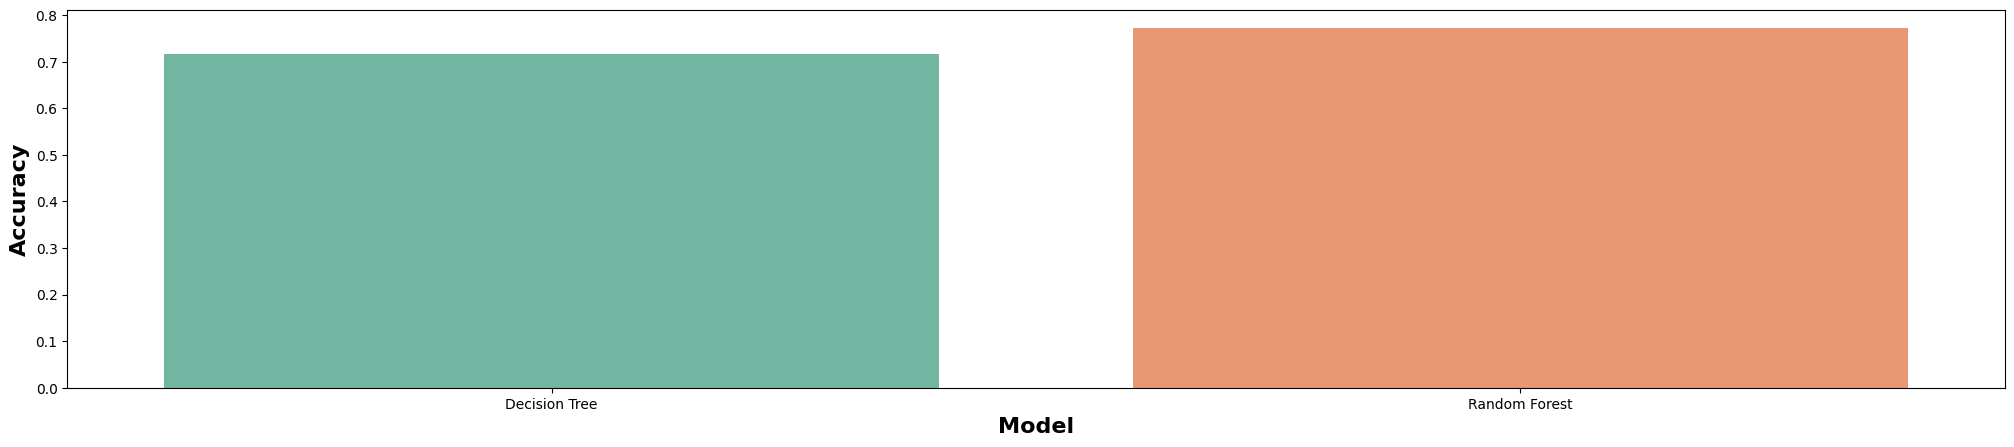

In [1786]:
fig, ax = plt.subplots(figsize=(25, 5), dpi=100)
sns.barplot(x=results_plot['Model'] , y=results_plot['Accuracy'], ax=ax, palette='Set2')
ax.set_xlabel('Model', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Accuracy', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Text(0, 0.5, 'Precision')

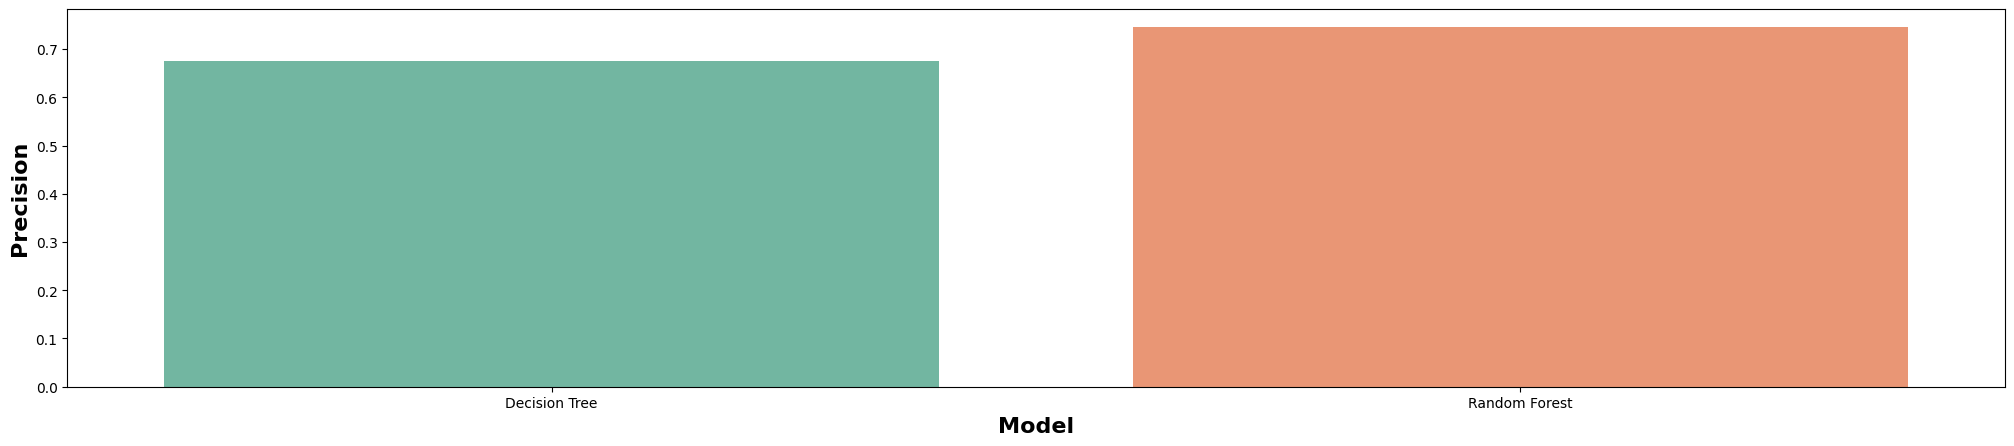

In [1787]:
fig, ax = plt.subplots(figsize=(25, 5), dpi=100)
sns.barplot(x=results_plot['Model'] , y=results_plot['Precision'], ax=ax, palette='Set2')
ax.set_xlabel('Model', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Precision', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Text(0, 0.5, 'Recall')

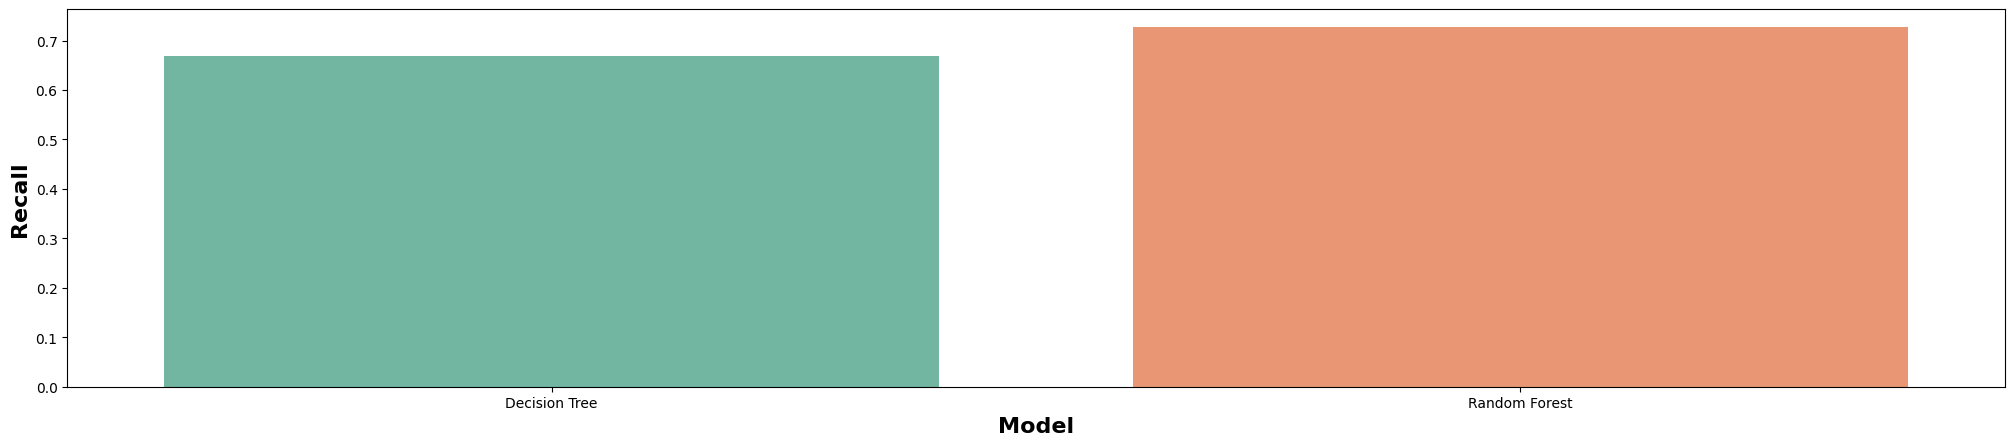

In [1788]:
fig, ax = plt.subplots(figsize=(25, 5), dpi=100)
sns.barplot(x=results_plot['Model'] , y=results_plot['Recall'], ax=ax, palette='Set2')
ax.set_xlabel('Model', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('Recall', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Text(0, 0.5, 'F1-Score')

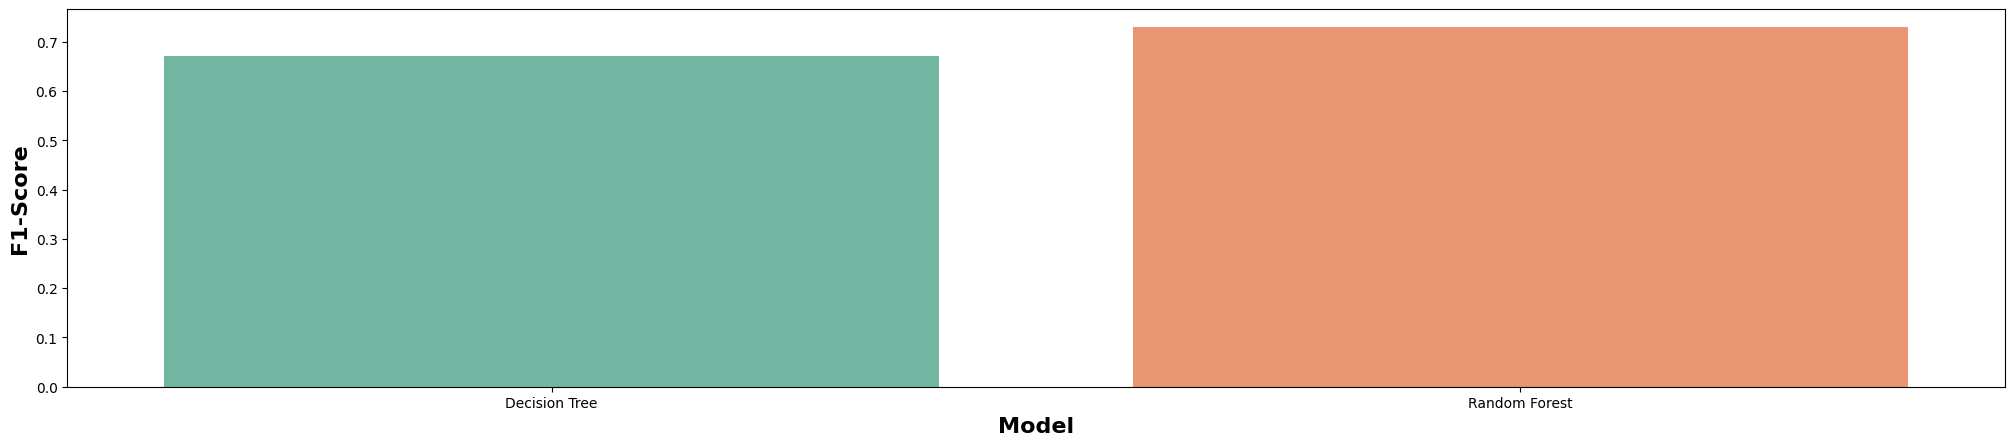

In [1789]:
fig, ax = plt.subplots(figsize=(25, 5), dpi=100)
sns.barplot(x=results_plot['Model'] , y=results_plot['F1-Score'], ax=ax, palette='Set2')
ax.set_xlabel('Model', fontdict={'color':'black', 'weight':'bold', 'size': 16})
ax.set_ylabel('F1-Score', fontdict={'color':'black', 'weight':'bold', 'size': 16})